In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 特徴量エンジニアリング

In [3]:
ans = pd.read_pickle('data3.pickle') 

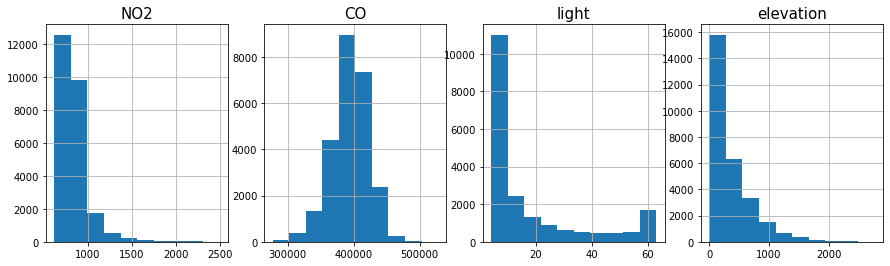

In [4]:
# 各特徴量の分布表示
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.hist(ans['NO2'])
plt.title('NO2', fontsize=15)
plt.grid()

plt.subplot(1,4,2)
plt.hist(ans['CO'])
plt.title('CO', fontsize=15)
plt.xticks([300000,400000, 500000])
plt.grid()

plt.subplot(1,4,3)
plt.hist(ans['light'])
plt.title('light', fontsize=15)
plt.grid()

plt.subplot(1,4,4)
plt.hist(ans['標高'])
plt.title('elevation', fontsize=15)
plt.grid()

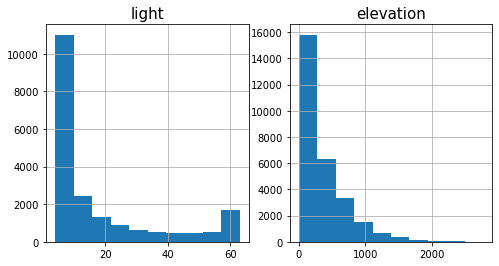

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(ans['light'])
plt.title('light', fontsize=15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(ans['標高'])
plt.title('elevation', fontsize=15)
plt.grid()

## 各特徴量の分布変換

偏りがあるデータにBox-Cox変換を適用して、分布を正規分布に近づけてみる。

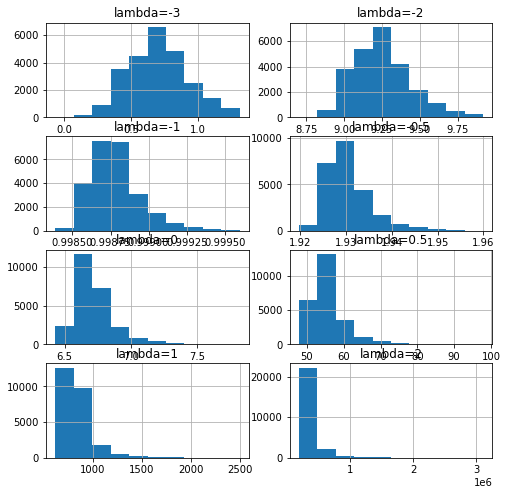

In [6]:
from scipy import stats as st

lambda_list=[-3,-2, -1, -0.5, 0, 0.5, 1, 2]

no2 = ans['NO2']

fig = plt.figure(figsize=(8, 8))

for i, i_lambda in enumerate(lambda_list):
    no2_cov=st.boxcox( no2, lmbda = i_lambda)
    fig.add_subplot(4, 2, i+1)
    plt.hist(no2_cov)
    plt.title('lambda={}'.format(i_lambda))
    plt.grid()

In [8]:
ans['標高'] = ans['標高'].map(lambda x: 0.1 if x<=0 else x)

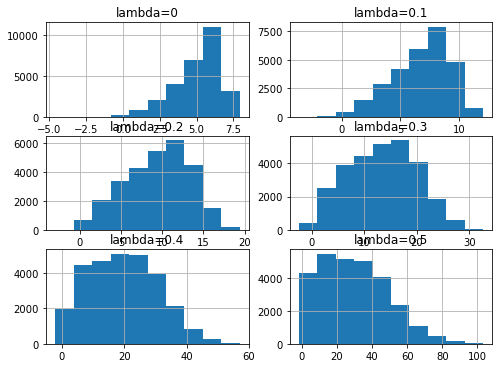

In [9]:
from scipy import stats as st

lambda_list=[0, 0.1, 0.2, 0.3, 0.4, 0.5]

hyoko = ans['標高']

fig = plt.figure(figsize=(8, 8))

for i, i_lambda in enumerate(lambda_list):
    no2_cov=st.boxcox(hyoko, lmbda = i_lambda)
    fig.add_subplot(4, 2, i+1)
    plt.hist(no2_cov)
    plt.title('lambda={}'.format(i_lambda))
    plt.grid()

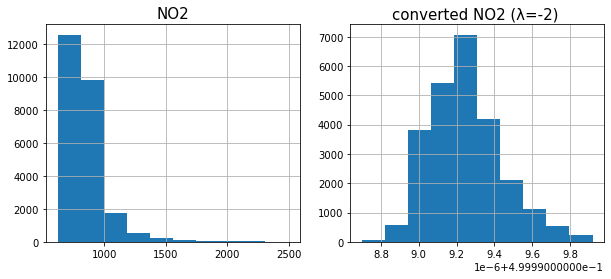

In [10]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(ans['NO2'])
plt.title('NO2', fontsize=15)
plt.grid()

plt.subplot(1,2,2)
no2_cov=st.boxcox(ans['NO2'], lmbda = -2)
plt.hist(no2_cov)
plt.title('converted NO2 (λ=-2) ', fontsize=15)
plt.grid()

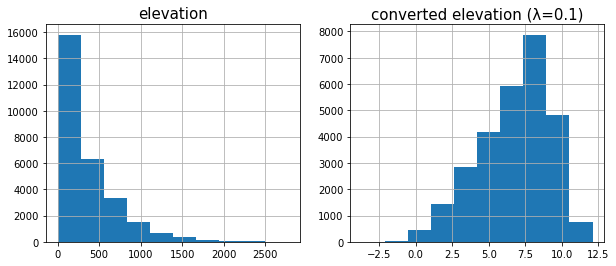

In [11]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(ans['標高'])
plt.title('elevation', fontsize=15)
plt.grid()

plt.subplot(1,2,2)
no2_cov=st.boxcox(ans['標高'], lmbda = 0.1)
plt.hist(no2_cov)
plt.title('converted elevation (λ=0.1)', fontsize=15)
plt.grid()

## 分布変換後のモデルの性能


In [21]:
test=pd.read_pickle('result_H30.pickle')
train=pd.read_pickle('result_R1.pickle')

In [22]:
train.corr()

,キレイ度,NO2,CO,light,標高
キレイ度,1.000000,-0.739413,-0.522232,-0.826894,0.415963
NO2,-0.739413,1.000000,0.665217,0.637575,-0.475015
CO,-0.522232,0.665217,1.000000,0.524744,-0.869455
light,-0.826894,0.637575,0.524744,1.000000,-0.443862
標高,0.415963,-0.475015,-0.869455,-0.443862,1.000000


In [23]:
test.corr()

,キレイ度,NO2,CO,light,標高
キレイ度,1.000000,-0.735581,-0.633353,-0.845691,0.570602
NO2,-0.735581,1.000000,0.698737,0.655899,-0.521876
CO,-0.633353,0.698737,1.000000,0.590658,-0.862184
light,-0.845691,0.655899,0.590658,1.000000,-0.538533
標高,0.570602,-0.521876,-0.862184,-0.538533,1.000000


In [24]:
from scipy import stats as st

train['NO2']=st.boxcox( train['NO2'], lmbda = -2)
test['NO2']=st.boxcox( test['NO2'], lmbda = -2)

test['標高'] = test['標高'].map(lambda x: 0.1 if x<=0 else x)
train['標高']=st.boxcox( train['標高'], lmbda = 0.1)
test['標高']=st.boxcox( test['標高'], lmbda = 0.1)

test.drop(['都道府県'], axis=1, inplace=True)
train.drop(['都道府県'],axis=1, inplace=True)

In [25]:
train.corr()

,キレイ度,NO2,CO,light,標高
キレイ度,1.000000,-0.760386,-0.522232,-0.826894,0.509403
NO2,-0.760386,1.000000,0.715276,0.679479,-0.594172
CO,-0.522232,0.715276,1.000000,0.524744,-0.842753
light,-0.826894,0.679479,0.524744,1.000000,-0.489109
標高,0.509403,-0.594172,-0.842753,-0.489109,1.000000


In [26]:
test.corr()

,キレイ度,NO2,CO,light,標高
キレイ度,1.000000,-0.778141,-0.633353,-0.845691,0.651503
NO2,-0.778141,1.000000,0.765592,0.728793,-0.685998
CO,-0.633353,0.765592,1.000000,0.590658,-0.839277
light,-0.845691,0.728793,0.590658,1.000000,-0.605336
標高,0.651503,-0.685998,-0.839277,-0.605336,1.000000


In [27]:
X_train = train.drop(['キレイ度'], axis=1)
y_train = train['キレイ度']
X_test = test.drop(['キレイ度'], axis=1)
y_test = test['キレイ度']

### パラメータチューニングする前

In [28]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=100)
model.fit(X_train, y_train)
y_pred_pre = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9896102518014925
0.7077787927906045


In [29]:
importances=pd.DataFrame({'fetures':X_train.columns,'importance':model.feature_importances_})
importances.sort_values('importance',ascending=False)

,fetures,importance
2,light,0.594326
0,NO2,0.229115
1,CO,0.096231
3,標高,0.080328


### パラメータチューニングした後

In [30]:
model = xgb.XGBRegressor(booster = 'gbtree',
                         objective = 'reg:linear',
                         eval_metric = 'rmse',
                         random_staate=100,
                         learning_rate=0.09,
                         n_estimators= 135,
                         max_depth = 1,
                         min_child_weight = 1,
                         colsample_bytree = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test, y_test))

[17:34:25] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "random_staate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.8099667733479186
0.7838801310732288


In [31]:
importances=pd.DataFrame({'fetures':X_train.columns,'importance':model.feature_importances_})
importances.sort_values('importance',ascending=False)

,fetures,importance
2,light,0.561088
0,NO2,0.321878
3,標高,0.084143
1,CO,0.032891


## グリッドサーチ

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [2, 3, 4],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [70, 80, 90, 100, 110, 120],
              'min_child_weight': [1, 2, 3, 4, 5]}

model = xgb.XGBRegressor(random_staate=100)
grid_search = GridSearchCV(model, param_grid, cv=10, return_train_score=True)

# GridSearchCVは最良パラメータの探索だけでなく、それを使った学習メソッドも持っています
grid_search.fit(X_train, y_train)


[17:37:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "random_staate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:37:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "random_staate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:37:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Par

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_staate=100, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,

In [33]:
print('best score: {:0.3f}'.format(grid_search.score(X_test, y_test)))
print('best params: {}'.format(grid_search.best_params_))
print('best val score:  {:0.3f}'.format(grid_search.best_score_))

best score: 0.781
best params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 80}
best val score:  0.637


### 散布図

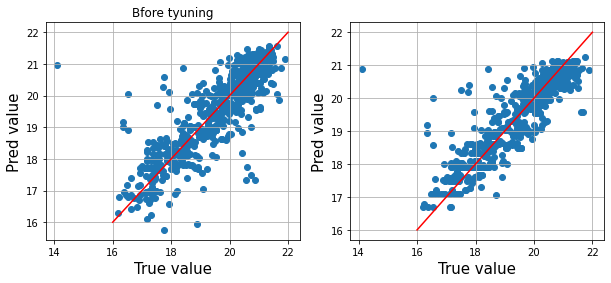

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_pre)
x = np.linspace(16,22)
y = x
plt.plot(x,y,'r')
plt.xlabel('True value', fontsize=15)
plt.ylabel('Pred value', fontsize=15)
plt.title('Bfore tyuning', fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred)
x = np.linspace(16,22)
y = x
plt.plot(x,y,'r')
plt.xlabel('True value', fontsize=15)
plt.ylabel('Pred value', fontsize=15)
plt.grid()
plt.show()
plt.show()

### 誤差分布

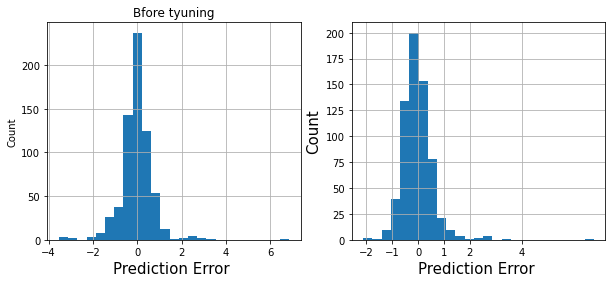

In [35]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
error = y_pred_pre - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ", fontsize=15)
plt.ylabel("Count")
plt.title('Bfore tyuning')
plt.grid()

plt.subplot(1,2,2)
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xticks([-2,-1,0,1,2,4])
plt.xlabel("Prediction Error ", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.grid()

### 外れ値の解析

In [37]:
dff2=pd.DataFrame(y_pred-y_test).rename(columns={'キレイ度':'誤差'})
pred=pd.DataFrame(y_pred)

import scipy.stats as st

dff2_std=pd.DataFrame(st.zscore(y_pred-y_test))
dff2_std.columns=['誤差_std']
dff2_std.index=dff2.index

y_pred_df= pd.Series(y_pred)
dff2_index_list=dff2_std[abs(dff2_std['誤差_std'])>1.96].index

test=pd.read_pickle('result_H30.pickle')
b=pd.concat([test, dff2],axis=1)
y_pred_df.index=b.index
b['予測']=y_pred_df


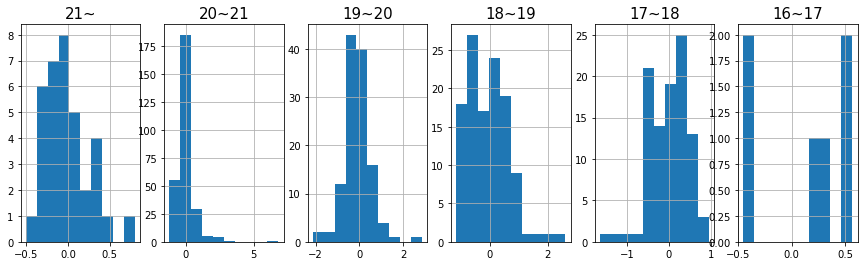

In [38]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,6,1)
plt.hist(b[b['予測']>=21]['誤差'])
plt.title('21~', fontsize=15)
plt.grid()

plt.subplot(1,6,2)
plt.hist(b[(b['予測']<21)&(b['予測']>=20)]['誤差'])
plt.title('20~21', fontsize=15)
plt.grid()

plt.subplot(1,6,3)
plt.hist(b[(b['予測']<20)&(b['予測']>=19)]['誤差'])
plt.title('19~20', fontsize=15)
plt.grid()

plt.subplot(1,6,4)
plt.hist(b[(b['予測']<19)&(b['予測']>=18)]['誤差'])
plt.title('18~19', fontsize=15)
plt.grid()

plt.subplot(1,6,5)
plt.hist(b[(b['予測']<18)&(b['予測']>=17)]['誤差'])
plt.title('17~18', fontsize=15)
plt.grid()

plt.subplot(1,6,6)
plt.hist(b[(b['予測']<17)&(b['予測']>=16)]['誤差'])
plt.title('16~17', fontsize=15)
plt.grid()

In [39]:
b

,キレイ度,NO2,CO,light,都道府県,標高,誤差,予測
0,19.65,733.0,394040.0,38.0,北海道,103.4,0.578100,20.228100
1,19.77,749.0,382193.0,46.0,北海道,150.7,-0.041854,19.728146
2,20.14,749.0,382193.0,46.0,北海道,150.8,-0.411854,19.728146
3,19.67,742.0,385582.0,5.5,北海道,196.0,1.249315,20.919315
4,20.53,693.0,364719.0,16.0,北海道,370.0,0.099795,20.629795
...,...,...,...,...,...,...,...,...
694,19.52,802.0,423454.0,61.0,宮崎県,15.3,-0.710723,18.809277
695,20.96,790.0,415124.0,13.0,宮崎県,248.8,-0.296521,20.663479
696,18.45,765.0,425862.0,45.0,鹿児島県,5.6,1.152449,19.602449
697,20.63,738.0,371641.0,11.0,鹿児島県,545.4,0.254634,20.884634


In [40]:
out2 = b.loc[dff2_index_list]
out2 

,キレイ度,NO2,CO,light,都道府県,標高,誤差,予測
3,19.67,742.0,385582.0,5.5,北海道,196.0,1.249315,20.919315
206,17.21,926.5,404424.0,63.0,山梨県,261.0,1.302161,18.512161
221,17.51,838.0,343150.0,8.0,山梨県,900.6,2.735670,20.245670
250,19.08,788.0,360197.0,14.0,長野県,709.7,1.480913,20.560913
459,17.76,877.0,394796.0,6.5,岐阜県,656.6,2.638184,20.398184
521,18.89,1208.0,435987.0,62.0,三重県,2.4,-1.296256,17.593744
579,18.55,896.0,372005.0,5.5,奈良県,656.6,1.784330,20.334330
582,21.61,851.0,428669.0,37.0,和歌山県,22.3,-2.041787,19.568213
583,21.69,851.0,428669.0,37.0,和歌山県,24.3,-2.121787,19.568213
597,18.71,827.0,416317.0,23.0,鳥取県,11.8,1.350484,20.060484


NO2データと標高データの分布を変換することにより、精度が少し上がり、過学習の程度がかなり小さくなったので、分布変換を適用する。